# Problem 2: Linear Discriminative Analysis

## 2.2 implement GaussianDiscAnalysis class, fit the model with breast cancer data (using the first two features), plot the testing data and the decision boundary

In [190]:
import numpy as np
import math
from numpy.linalg import inv,det
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


class GaussianDiscAnalysis:
    """
    Fits a Linear Discriminant Analysis Model for binary class

    """

    def compute_phi(self, y):
        """
        calculate prior probability of positive class: P(Y=1)
        :param y: matrix of nx1
        :return: the prior probability
        """
        num_pos = np.count_nonzero(y == 1)
        total = y.shape[0]
        return num_pos/total
        
    def compute_mu(self, X, y):
        """
        compute Mu for the positive class and negative class
        :param X: matrix of nxd  (n is sample size and d is number of features)
        :param y: matrix of nx1
        :param cls: integer 0/1
        :return: matrix of 2xd with the first row being the mean of 0 class and the second row being the mean of class 1
        """
        # initialize the matrix Mu
        mu = np.zeros((2, X.shape[-1]), dtype=np.float32)
        
        # compute Mu using the formula
        # TODO
        pos_class = X[y==1]
        neg_class = X[y==0]
        pos_mean = np.mean(pos_class,axis=0)
        print("shape of pos mean ",pos_mean.shape)
        neg_mean = np.mean(neg_class,axis=0)
        mu[0,:] = neg_mean
        mu[1,:] = pos_mean
        print("shape of mu: ",mu.shape)
        return mu
    
    def compute_sigma(self, X, y):
        """
        compute the common covariance matrix which is shared by the two classes
        :param X: matrix of nxd  (n is sample size and d is number of features)
        :param y: matrix of nx1
        :return:  dxd covariance matrix
        """
        # compute Mu first
        mu = self.compute_mu(X, y)
        print(mu.shape)
        
        d= X.shape[1]
        
        # compute the covariance matrix using the formula
        # TODO
        pos_mean = mu[1,:].reshape((d,1))
        print("pos mean: ",pos_mean)
        neg_mean = mu[0,:].reshape((d,1))
        print("neg mean: ",neg_mean)
        sigma = np.zeros((X.shape[1],X.shape[1]))
        
        pos_data = X[y==1]
        neg_data = X[y==0]
        
        for i in range(neg_data.shape[0]):
            x_i = neg_data[i,:].reshape((d,1))
            temp = (x_i-neg_mean)@((x_i-neg_mean).T)
            sigma += temp
            
        for i in range(pos_data.shape[0]):
            x_i = pos_data[i,:].reshape((d,1))
            temp = (x_i-pos_mean)@((x_i-pos_mean).T)
            sigma += temp
            
        sigma = sigma/X.shape[0]
        print("compute sigma, sigma shape: ",sigma.shape)
        return sigma
        
    def gaussian_p(self, x, cls):
        """
        Probability of X=x given y (Assume the conditional distribution is gaussian distribution)
        To get the inverse and determinant of an matrix you can use the module np.linalg
        :param x: 1D vector which is the feature vector for one observation
        :param cls: interger 0/1
        :return: probability density value of X=x|Y=cls
        """
        # TODO
        
        # compute d
        d = x.shape[0]
        
        # compute the inverse of sigma
#         print("shape of sigma:",self.sigma.shape)
#         print("inside gaussian_p, sigma is: ",self.sigma)
        sig_inv = inv(self.sigma)
        
        # compute determinant of sigma
        sig_det = det(self.sigma)
        
        # compute the probability density value of X=x|Y=cls
        mu = self.mu[cls,:]
        
        prob_dens = 1/np.sqrt(((2*math.pi)**d) * sig_det)*np.exp(-1/2* (x-mu).T @ sig_inv @ (x-mu))
        return prob_dens
        

    def fit(self, X, y):
        """Computes mean, covariance and proabilities of y (phi)"""
        self.d = X.shape[1]
        # the prior probability of Y=1
        self.phi = self.compute_phi(y)
        # mean of X for each class
        self.mu = self.compute_mu(X, y)
        # the common covariance matrix
        self.sigma = self.compute_sigma(X, y)

    def predict(self, X):
        """
        make prediction based on P(Y|X).
        You can effectively compare P(Y=1)*P(X|Y=1) v.s. P(Y=0)*P(X|Y=0)
        :param X: 2D vector which each row representing a data point
        :return: 1D vector which each element being 0/1
        """
        # TODO
        
        # for each data point, calculate P(Y=1)*P(X|Y=1) and P(Y=0)*P(X|Y=0)
        # if P(Y=1)*P(X|Y=1) > P(Y=0)*P(X|Y=0), then y is predicted to be 1
        # else, y is predicted to be 0
        result = np.zeros((X.shape[0],1))
        
        for i in range(X.shape[0]):
            gauss_p1 = self.gaussian_p( X[i,:], 1)
            gauss_p0 =self.gaussian_p( X[i,:], 0)
            if(self.phi*gauss_p1 > (1-self.phi)*gauss_p0):
                result[i,:] = 1
            else:
                result[i,:] = 0
       
        return result
        

In [191]:
breast_cancer = load_breast_cancer()
data = np.array(breast_cancer.data)
label = np.array(breast_cancer.target)
data = MinMaxScaler().fit_transform(data)
# label

In [192]:
# Split the training set and test set (only keep the first two features )
train_data, test_data, train_label, test_label = train_test_split(data[:, :2], label, test_size=1 / 4, random_state=0)

In [193]:
# fit the model using the training data
gda = GaussianDiscAnalysis()
gda.fit(train_data, train_label)

shape of pos mean  (2,)
shape of mu:  (2, 2)
shape of pos mean  (2,)
shape of mu:  (2, 2)
(2, 2)
pos mean:  [[0.2464015 ]
 [0.27905852]]
neg mean:  [[0.4964535]
 [0.394242 ]]
compute sigma, sigma shape:  (2, 2)


In [194]:
# get predictions for the test data, print out the accuracy score
test_pred = gda.predict(test_data)

print('the accuracy score is {}'.format(accuracy_score(test_label, test_pred)))

the accuracy score is 0.8951048951048951


temp is  [18.24304816  6.66444599]
shape of row1 and row2 () ()
shape of x1 (143, 1)
2.73736904325203
coeff1:  -2.73736904325203
coeff2:  1.4311619858530373
shape of x2, (143, 1)
shape of test data (143, 2)


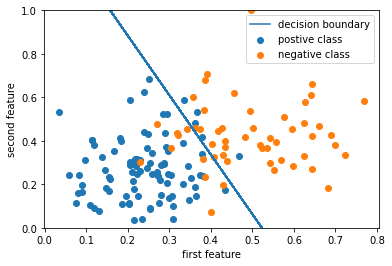

In [197]:
""""P2.2 plot the data and the decision boundary"""
# data visualization

# plot the testing data (x axis: first feature, y axis: second feature), use different colors for the two classes

# on the same figure, plot the decision boundary

# print out the intercept and the slope of the linear decision boundary

# TODO
phi_1 = gda.phi
phi_0 = 1-gda.phi


temp = inv(gda.sigma)@ (gda.mu[0,:]-gda.mu[1,:])
print("temp is ",temp)
row_1 = temp[0]
row_2 = temp[1]
print("shape of row1 and row2",row_1.shape,row_2.shape)

x = test_data[:,0]
x = x.reshape((x.shape[0],1))
print("shape of x1",x.shape)
print(row_1/row_2)

coeff_1 = -(row_1/row_2)
coeff_2 = - (1/row_2)*math.log(phi_0/phi_1) + (1/row_2)*(1/2)*((gda.mu[0,:]+gda.mu[1,:]).T @ inv(gda.sigma) @ (gda.mu[0,:]-gda.mu[1,:]))

print("coeff1: ",coeff_1)
print("coeff2: ",coeff_2)
y= x * coeff_1 +coeff_2
print("shape of x2,",y.shape)


plt.plot(x,y,label="decision boundary")
print("shape of test data",test_data.shape)

pos_data = test_data[test_label==1]
neg_data = test_data[test_label==0]
plt.scatter(pos_data[:,0],pos_data[:,1],label="postive class")
plt.scatter(neg_data[:,0],neg_data[:,1],label="negative class")
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.ylim([0, 1])
plt.legend()
plt.show()


**The coefficient of decision boundary:**
+ The boundary is of the form x2 = ax1 + b
+ a = coeff_1 =  -2.73736904325203
+ b = coeff_2 = 1.4311619858530373